# NBA Player Salary

By Reimer A. Romero H.

En menos de dos meses iniciará la temporada 2022-23 de la NBA. La prensa ha dado a conocer el sueldo que devengará Lebrom James y al parecer lo colocará como el mejor pagado en la historia. En este notebook extraeremos y analizaremos la evolución de los sueldos de los jugadores de la NBA desde la temporada 1991-1992 hasta la 2021-2022. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

First, we reads the NBA_data.csv, containing information about champ teams and MVP players by year, this file was built by hand.

In [11]:
dataNBA = pd.read_csv('dataset/NBA_data.csv',index_col=0,names=['year','ChTeam','id_MVP','MVP_name','MVP_salary'])
dataNBA

,ChTeam,id_MVP,MVP_name,MVP_salary
year,,,,
1992,CHI,j/jordanmi01,Jordan M.,3325000
1993,CHI,b/barklch01,Barkley CH.,2420000
1994,HOU,o/olajuha01,Olajuwon H.,3170000
1995,HOU,r/robinda01,Robinson D.,7730000
1996,CHI,j/jordanmi01,Jordan M.,3850000
1997,CHI,m/malonka01,Malone K.,4657000
1998,CHI,j/jordanmi01,Jordan M.,33140000
1999,SAS,m/malonka01,Malone K.,6142000
2000,LAL,o/onealsh01,O'Neals Sh.,17142000


Next we move over 30 seasons thoght the csv files, the salaryNBAXXXX.csv files contains:
name_player,his_team,his_salary information on all NBA players by year (XXXX). This data was wraping from https://www.basketball-reference.com/leagues/

In [3]:
all_Players = pd.DataFrame(columns=['team','name','salary'])
all_Teams   = pd.DataFrame(columns=['team','salary'])

playersBPs = pd.DataFrame(columns=['team','name','salary'])
teamsBPs = pd.DataFrame(columns=['team','salary'])
champTeams = pd.DataFrame(columns=['team','salary'])

Years = np.uint16(np.linspace(1992,2022,31)) 
for year in Years:
    
    tablePlayers = pd.read_csv('dataset/salaryNBA' +str(year)+ '.csv',names=['team','name','salary'])
    tablePlayers.insert(0,'year',year,True)
    
    tableTeams = tablePlayers.groupby("team").salary.sum().reset_index()
    tableTeams.insert(0,'year',year,True)
    
    all_Players = pd.concat([all_Players,tablePlayers])
    all_Teams   = pd.concat([all_Teams,  tableTeams ])
                                
    # Best Paid players
    new_playerBPs = tablePlayers.loc[tablePlayers['salary']==tablePlayers['salary'].max()]
    playersBPs = pd.concat([playersBPs,new_playerBPs])
    
    # Best Paid Teams
    new_tableTeams = tableTeams.loc[tableTeams['salary']==tableTeams['salary'].max()]
    teamsBPs   = pd.concat([teamsBPs,new_tableTeams]) 
    
    new_champTeams =  tableTeams[tableTeams['team']==dataNBA['ChTeam'][year]]
    champTeams = pd.concat([champTeams,new_champTeams])
  


# Ploting first results


## Two plot to describe the best payed player and team

In [4]:
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

<IPython.core.display.Javascript object>


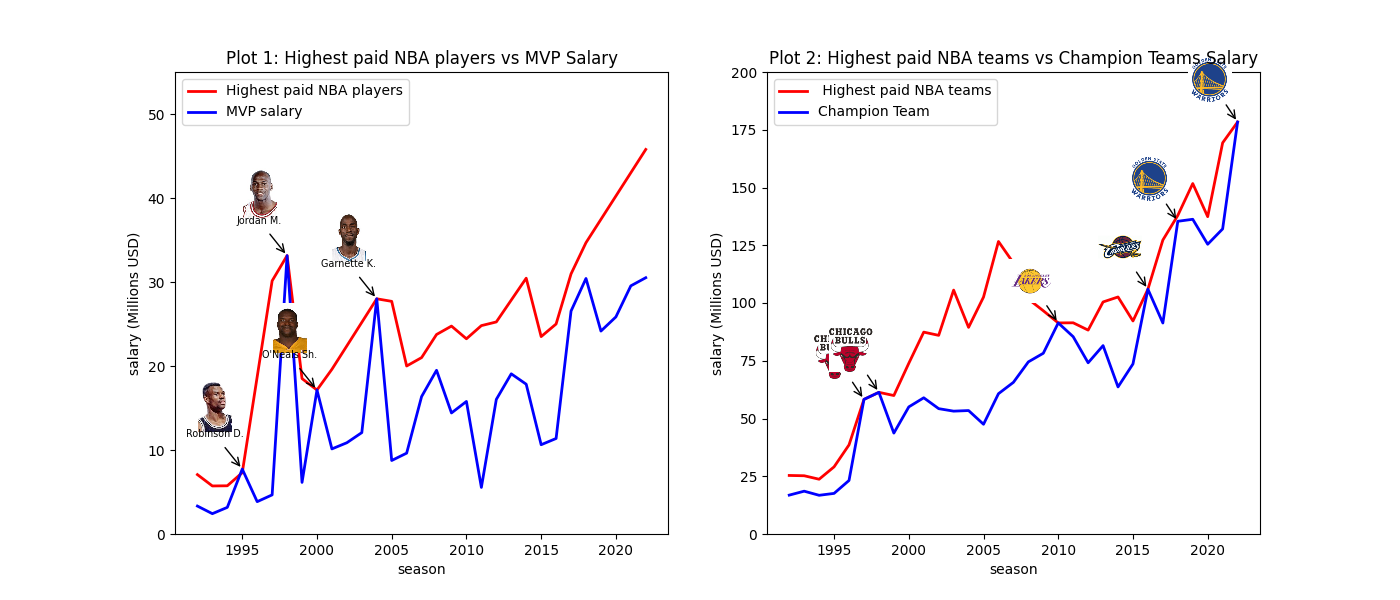

Text(0.5, 1.0, 'Plot 2: Highest paid NBA teams vs Champion Teams Salary')

In [5]:
fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Best paid players
axes[0].plot(playersBPs['year'], playersBPs['salary']/1e6, '-r', linewidth=2, label="Highest paid NBA players")
# MVPs
axes[0].plot( dataNBA.index, dataNBA['MVP_salary']/1e6, '-b', linewidth=2, label="MVP salary")
#axes[0].plot(Years, Players['mean']/1e6, '-g', linewidth=2,label="BP")
axes[0].set_xlabel('season')
axes[0].set_ylabel('salary (Millions USD)')
axes[0].set_ylim([0,55])
axes[0].legend(fontsize='medium',loc='upper left')
axes[0].set_title('Plot 1: Highest paid NBA players vs MVP Salary')

# Best paid teams 
axes[1].plot(teamsBPs['year'], teamsBPs['salary']/1e6, '-r', linewidth=2, label=" Highest paid NBA teams")
# Champion Teams
axes[1].plot(champTeams['year'], champTeams['salary']/1e6, '-b', linewidth=2,label="Champion Team")
axes[1].set_xlabel('season')
axes[1].set_ylim([0,200])
axes[1].set_ylabel('salary (Millions USD)')
axes[1].legend(fontsize='medium',loc='upper left')
axes[1].set_title('Plot 2: Highest paid NBA teams vs Champion Teams Salary')


### Plot annotations MVP salary

In [6]:
target_years = [1995,1998,2000,2004]

for id_,y,s in zip(dataNBA['id_MVP'][target_years].tolist(), target_years, dataNBA.loc[target_years,'MVP_salary']/1e6  ):
        
        file_image = f"dataset/{id_[2:]}.jpg"
        img = plt.imread(file_image, format='jpg')
        imagebox = OffsetImage(img, zoom=0.200)
        imagebox.image.axes = axes[0]
        ab = AnnotationBbox(imagebox, (y,s),
                            xybox=(-20, 45),
                            xycoords='data',
                            boxcoords="offset points",
                            pad=0, frameon=False)
        axes[0].add_artist(ab)
        
        Textbox = TextArea(f"{dataNBA.loc[y].MVP_name}",{'fontsize':'x-small'})
        ab = AnnotationBbox(Textbox, (y,s),
                            frameon=False,        
                            xybox=(-20, 25),
                            xycoords='data',
                            boxcoords="offset points",
                            arrowprops=dict(arrowstyle="->"))
        axes[0].add_artist(ab)

### Plot annotations Champ teams salary

In [7]:
target_years = [1997,1998,2010,2016,2018,2022]
for y in target_years:
        team = champTeams.loc[champTeams['year']==y]['team'].tolist()[0]
        s = champTeams.loc[champTeams['year']==y]['salary']/1e6 
        
        file_image = f"dataset/{team}.png"
        img = plt.imread(file_image, format='png')
        imagebox = OffsetImage(img, zoom=0.250)
        imagebox.image.axes = axes[1]
        ab = AnnotationBbox(imagebox, (y,s),
                            xybox=(-20, 30),
                            xycoords='data',
                            boxcoords="offset points",
                            pad=0, frameon=False,
                            arrowprops=dict(arrowstyle="->")
                           )
        axes[1].add_artist(ab)
        

# Second Results: median salary

We can get the statistical summary by year  on salary issue. Next results are two box plot: 1) players salary and 2) teams salary.

<IPython.core.display.Javascript object>


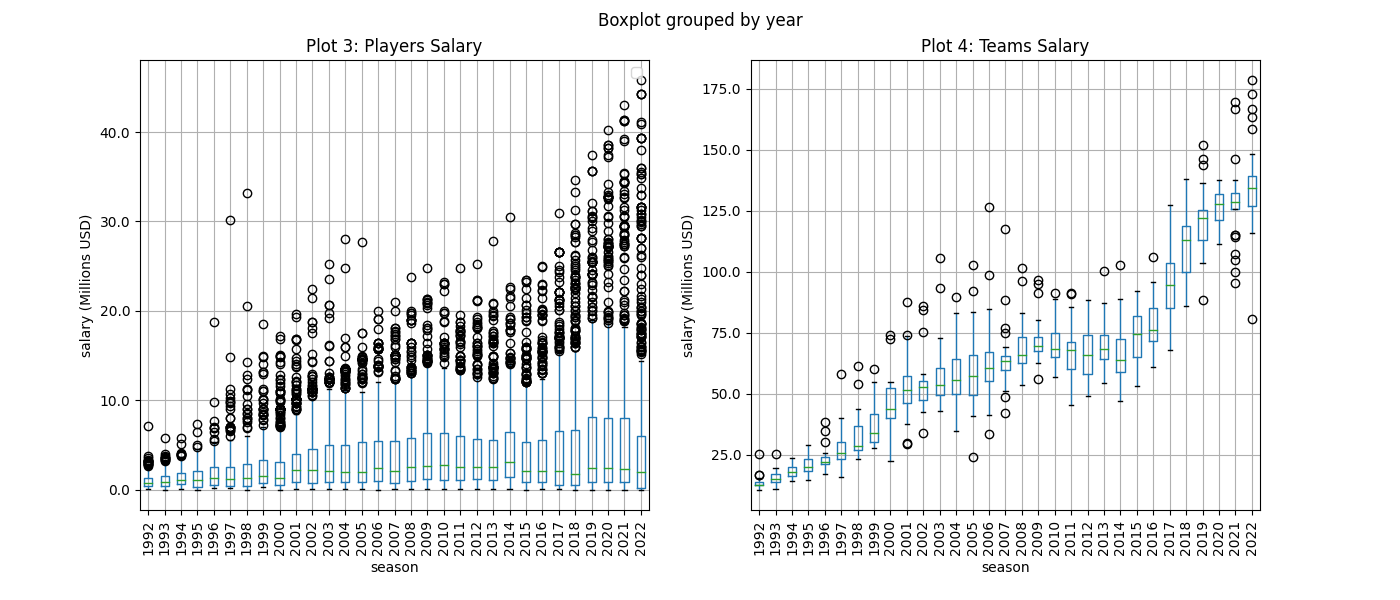

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [8]:
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
fig2, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# box plot  players results
all_Players.boxplot('salary',by='year',rot=90,ax=ax1)
ax1.set_title('Plot 3: Players Salary')
ax1.legend(fontsize='medium',loc='upper right')


# box plot teams results
all_Teams.boxplot('salary',by='year',rot=90,ax=ax2)
ax2.set_title('Plot 4: Teams Salary')


# adding horizontal grid lines
for ax in (ax1,ax2):
    ax.set_xlabel('season')
    ax.set_ylabel('salary (Millions USD)')
    ax.yaxis.set_major_formatter(lambda y, pos: f"{float(y/1e6)}") 
    ax.xaxis.set_major_formatter(lambda x, pos: f"{x + 1991}")
    


# Additional results: How many best paid players there are?

Question can be answered by taking the statistical summary giving by each box. The best payed salary are the outliers, or o-marks in the box plot. Remember, values outliers are highest that Q_75 + 1.5IQ, where Q_75 is quantil 75% and IQ is Inter Quantil value (Q_75 - Q_25). To know details about this, you can  see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm or 
http://www.physics.csbsju.edu/stats/box2.html .

In [9]:
nuPBP = pd.DataFrame(columns=['salary outliers','No. PBP', '% PBP'])
for y in Years:
    pp = all_Players['salary'][all_Players['year']==y]
    Q1 = pp.quantile(.25)
    Q3 = pp.quantile(.75)
    IQ = Q3-Q1
    nuPBP.loc[y,'salary outliers'] = Q3 + 1.5+IQ                                   # upper bond (upb)
    nuPBP.loc[y,'No. PBP'] = pp[pp>Q3+1.5*IQ].count()                              # salary's players > upb 
    nuPBP.loc[y,'% PBP'] = 100 *( pp[pp>Q3+1.5*IQ].count()/ pp.count() ).round(3)  # %
   

In [10]:
nuPBP

,salary outliers,No. PBP,% PBP
1992,2207501.5,17,4.4
1993,2622501.5,11,2.7
1994,3030751.5,9,2.3
1995,3827501.5,4,0.9
1996,4466001.5,9,2.3
1997,4690001.5,21,5.1
1998,5305717.5,20,4.4
1999,5899916.5,26,6.0
2000,5699801.5,51,9.5
2001,7171881.5,46,9.8


# END